In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/london-bike-sharing-dataset/london_merged.csv


In [2]:
df_london = pd.read_csv("/kaggle/input/london-bike-sharing-dataset/london_merged.csv")
df_london

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [3]:
df_london.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [4]:
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
float_32_columns = ['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday', 'is_weekend', 'season']
df_london[float_32_columns] = df_london[float_32_columns].astype('float32').round(2)

In [6]:
df_london.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101685,12.468090,11.520836,72.324951,15.913064,2.722752,0.022051,0.285403,1.492075
std,1085.108154,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


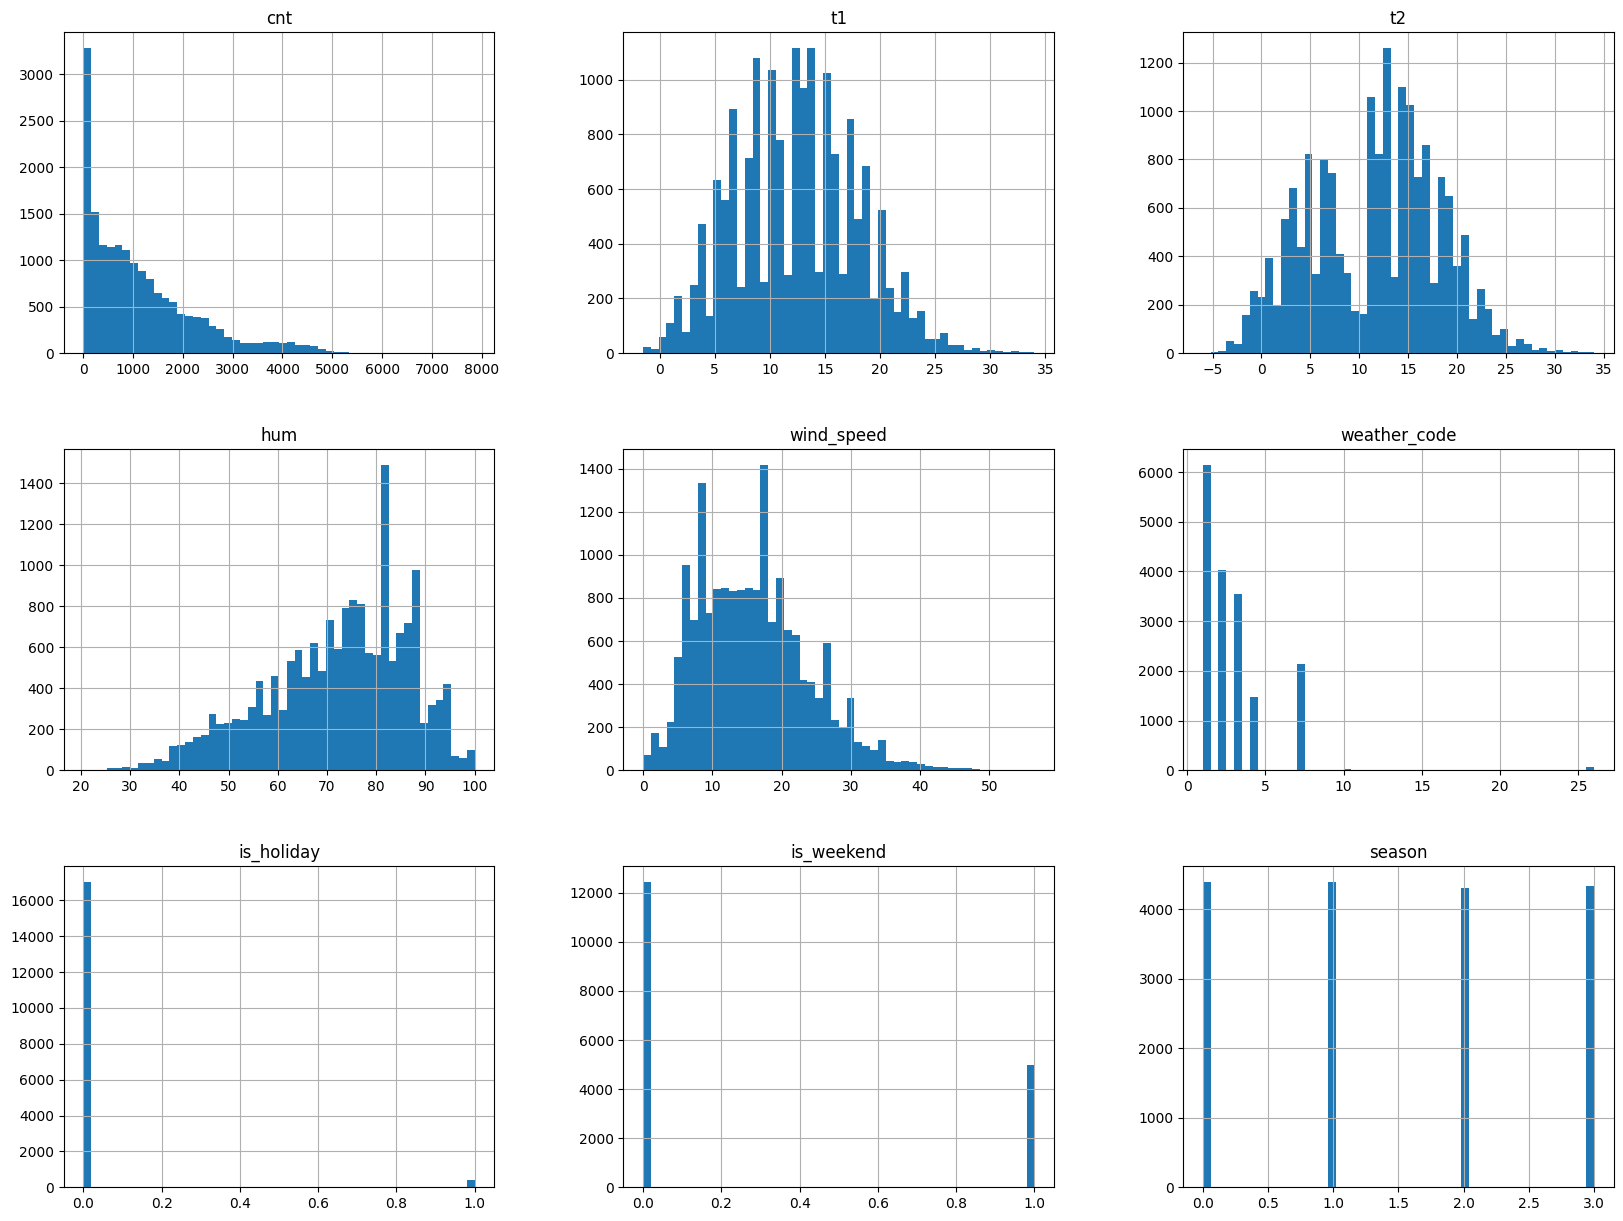

In [7]:
import matplotlib.pyplot as plt

hist = df_london.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
df_london['weather_code'].value_counts()

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

In [9]:
df_london['wind/hum'] = df_london['wind_speed']/df_london['hum']

In [10]:
categ_columns = ['weather_code', 'is_holiday', 'is_weekend', 'season']

df_london = pd.get_dummies(df_london, columns = categ_columns, drop_first = True)
df_london

,timestamp,cnt,t1,t2,hum,wind_speed,wind/hum,weather_code_2.0,weather_code_3.0,weather_code_4.0,weather_code_7.0,weather_code_10.0,weather_code_26.0,is_holiday_1.0,is_weekend_1.0,season_1.0,season_2.0,season_3.0
0,2015-01-04 00:00:00,182.0,3.0,2.0,93.0,6.0,0.064516,False,True,False,False,False,False,False,True,False,False,True
1,2015-01-04 01:00:00,138.0,3.0,2.5,93.0,5.0,0.053763,False,False,False,False,False,False,False,True,False,False,True
2,2015-01-04 02:00:00,134.0,2.5,2.5,96.5,0.0,0.000000,False,False,False,False,False,False,False,True,False,False,True
3,2015-01-04 03:00:00,72.0,2.0,2.0,100.0,0.0,0.000000,False,False,False,False,False,False,False,True,False,False,True
4,2015-01-04 04:00:00,47.0,2.0,0.0,93.0,6.5,0.069892,False,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042.0,5.0,1.0,81.0,19.0,0.234568,False,True,False,False,False,False,False,False,False,False,True
17410,2017-01-03 20:00:00,541.0,5.0,1.0,81.0,21.0,0.259259,False,False,True,False,False,False,False,False,False,False,True
17411,2017-01-03 21:00:00,337.0,5.5,1.5,78.5,24.0,0.305732,False,False,True,False,False,False,False,False,False,False,True
17412,2017-01-03 22:00:00,224.0,5.5,1.5,76.0,23.0,0.302632,False,False,True,False,False,False,False,False,False,False,True


In [11]:
corr_matrix = df_london[['cnt', 't1', 't2', 'hum', 'wind_speed', 'wind/hum']].corr()
sorted_corr = corr_matrix['cnt'].sort_values(ascending=False)

sorted_corr

# Yeni eklenen kolonun performansa etkisi (cross vall ile)
# Features weight ayarı 
# Kategorik verilen korr etkisi
# Saat üzerinden feature eng.

cnt           1.000000
t1            0.388798
t2            0.369035
wind/hum      0.283401
wind_speed    0.116295
hum          -0.462901
Name: cnt, dtype: float64

### 